## Loading the data and other imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Co2.csv')

### Data Overview

In [4]:
df.head(5)

,sound_pressure_level [dba],air_temperature [Celsius],pm2.5 [mu_g/m3],indoor_co2 [ppm],new_time,outdoor_relative_humidity [%],fcu_fan_speed [Hz],occupant_count [number],illuminance [lux]
0,57.073334,23.564333,2.066667,453.500000,2021-09-07 00:00:00,97.704887,0.0,0,0.0
1,57.016666,23.487333,1.966667,448.866669,2021-09-07 00:05:00,97.404854,0.0,0,0.0
2,57.083332,23.424000,1.833333,447.333344,2021-09-07 00:10:00,97.400002,0.0,0,0.0
3,57.093334,23.253000,1.700000,446.066681,2021-09-07 00:15:00,97.298378,0.0,0,0.0
4,57.016666,23.309000,1.666667,444.366669,2021-09-07 00:20:00,97.403244,0.0,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8352 entries, 0 to 8351
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sound_pressure_level [dba]     8352 non-null   float64
 1   air_temperature [Celsius]      8352 non-null   float64
 2   pm2.5 [mu_g/m3]                8352 non-null   float64
 3   indoor_co2 [ppm]               8352 non-null   float64
 4   new_time                       8352 non-null   object 
 5   outdoor_relative_humidity [%]  8352 non-null   float64
 6   fcu_fan_speed [Hz]             8352 non-null   float64
 7   occupant_count [number]        8352 non-null   int64  
 8   illuminance [lux]              8352 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 587.4+ KB


In [6]:
df.describe()

,sound_pressure_level [dba],air_temperature [Celsius],pm2.5 [mu_g/m3],indoor_co2 [ppm],outdoor_relative_humidity [%],fcu_fan_speed [Hz],occupant_count [number],illuminance [lux]
count,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000
mean,55.037814,25.572291,5.729438,467.198732,86.918065,12.204971,1.207974,52.302953
std,3.012204,1.831005,11.261687,80.700313,11.659597,14.364453,3.262252,80.991373
min,48.450001,20.442759,0.133333,400.000000,40.300117,0.000000,0.000000,0.000000
25%,52.450001,24.585333,2.066667,426.631248,79.017054,0.000000,0.000000,0.000000
50%,54.624166,25.512000,3.466667,440.321838,88.406494,0.000000,0.000000,0.000000
75%,56.400834,26.821451,5.066667,469.210358,98.000000,27.216917,1.000000,99.479168
max,78.596664,33.995171,186.100006,1489.357178,100.000000,50.116932,22.000000,2015.545044


In [7]:
df['new_time'] = pd.to_datetime(df['new_time'])

In [8]:
df.corr()

,sound_pressure_level [dba],air_temperature [Celsius],pm2.5 [mu_g/m3],indoor_co2 [ppm],new_time,outdoor_relative_humidity [%],fcu_fan_speed [Hz],occupant_count [number],illuminance [lux]
sound_pressure_level [dba],1.000000,-0.381526,0.028976,0.236388,-0.363390,0.187337,-0.079722,-0.118265,0.364023
air_temperature [Celsius],-0.381526,1.000000,0.242077,0.212621,0.628958,-0.112686,-0.040628,0.163090,-0.056058
pm2.5 [mu_g/m3],0.028976,0.242077,1.000000,0.298073,0.320349,0.194260,-0.141571,-0.049670,0.144186
indoor_co2 [ppm],0.236388,0.212621,0.298073,1.000000,0.026863,0.112342,-0.012995,-0.009305,0.121677
new_time,-0.363390,0.628958,0.320349,0.026863,1.000000,0.152269,-0.203469,0.047274,0.087831
outdoor_relative_humidity [%],0.187337,-0.112686,0.194260,0.112342,0.152269,1.000000,-0.526864,-0.303267,0.365561
fcu_fan_speed [Hz],-0.079722,-0.040628,-0.141571,-0.012995,-0.203469,-0.526864,1.000000,0.352419,-0.266361
occupant_count [number],-0.118265,0.163090,-0.049670,-0.009305,0.047274,-0.303267,0.352419,1.000000,-0.202761
illuminance [lux],0.364023,-0.056058,0.144186,0.121677,0.087831,0.365561,-0.266361,-0.202761,1.000000


<Axes: >

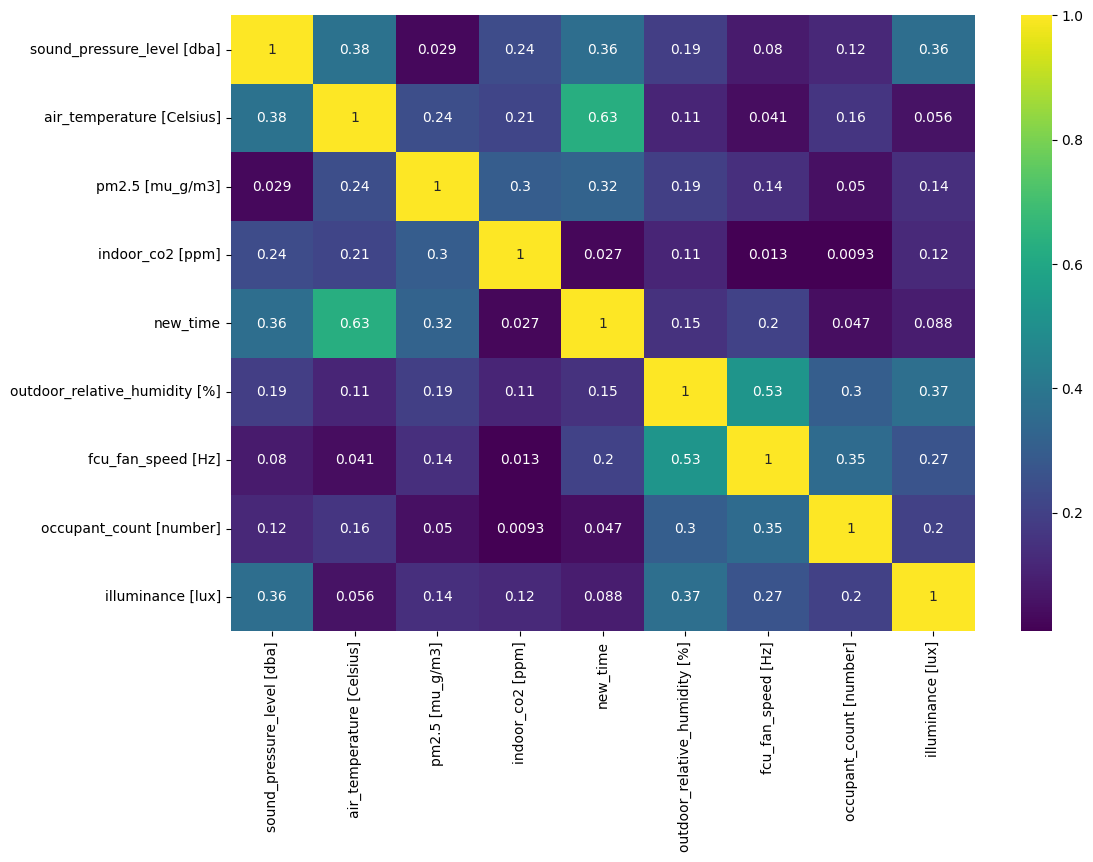

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().abs(),annot=True,cmap='viridis')

In [10]:
df.corr()["indoor_co2 [ppm]"].sort_values()

fcu_fan_speed [Hz]              -0.012995
occupant_count [number]         -0.009305
new_time                         0.026863
outdoor_relative_humidity [%]    0.112342
illuminance [lux]                0.121677
air_temperature [Celsius]        0.212621
sound_pressure_level [dba]       0.236388
pm2.5 [mu_g/m3]                  0.298073
indoor_co2 [ppm]                 1.000000
Name: indoor_co2 [ppm], dtype: float64

In [11]:
df.corr()["pm2.5 [mu_g/m3]"].sort_values()

fcu_fan_speed [Hz]              -0.141571
occupant_count [number]         -0.049670
sound_pressure_level [dba]       0.028976
illuminance [lux]                0.144186
outdoor_relative_humidity [%]    0.194260
air_temperature [Celsius]        0.242077
indoor_co2 [ppm]                 0.298073
new_time                         0.320349
pm2.5 [mu_g/m3]                  1.000000
Name: pm2.5 [mu_g/m3], dtype: float64

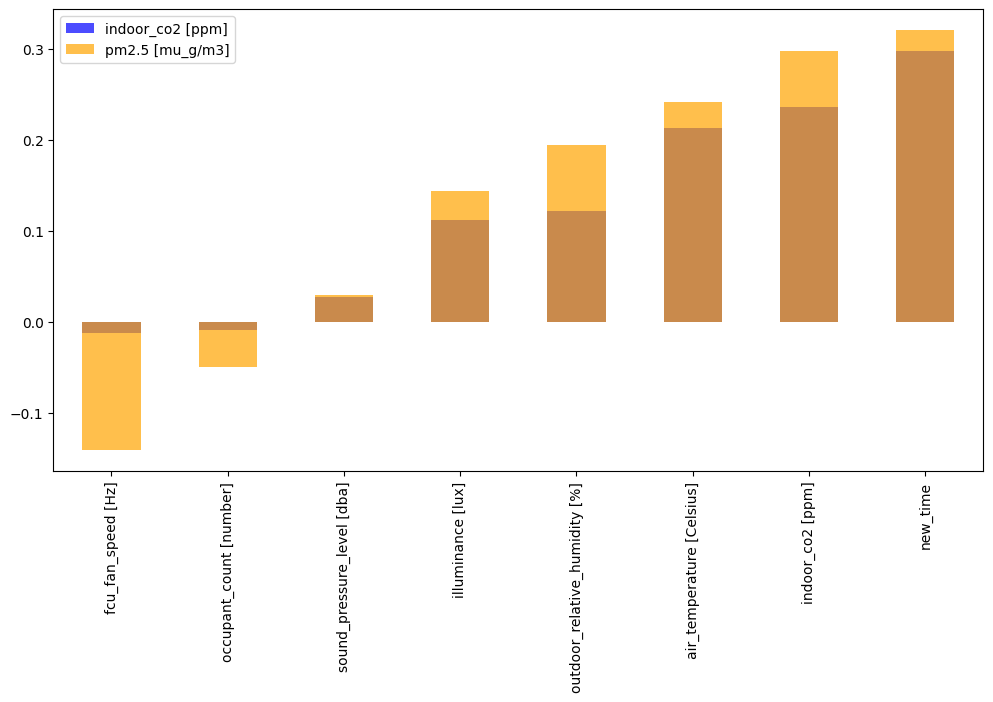

In [12]:
plt.figure(figsize=(12, 6))
df.corr()["indoor_co2 [ppm]"].sort_values().drop("indoor_co2 [ppm]").plot(kind="bar", color='blue', alpha=0.7, label='indoor_co2 [ppm]')
df.corr()["pm2.5 [mu_g/m3]"].sort_values().drop("pm2.5 [mu_g/m3]").plot(kind="bar", color='orange', alpha=0.7, label='pm2.5 [mu_g/m3]')
plt.legend()

In [13]:
df.set_index('new_time', inplace=True)

In [14]:
df.head()

,sound_pressure_level [dba],air_temperature [Celsius],pm2.5 [mu_g/m3],indoor_co2 [ppm],outdoor_relative_humidity [%],fcu_fan_speed [Hz],occupant_count [number],illuminance [lux]
new_time,,,,,,,,
2021-09-07 00:00:00,57.073334,23.564333,2.066667,453.500000,97.704887,0.0,0,0.0
2021-09-07 00:05:00,57.016666,23.487333,1.966667,448.866669,97.404854,0.0,0,0.0
2021-09-07 00:10:00,57.083332,23.424000,1.833333,447.333344,97.400002,0.0,0,0.0
2021-09-07 00:15:00,57.093334,23.253000,1.700000,446.066681,97.298378,0.0,0,0.0
2021-09-07 00:20:00,57.016666,23.309000,1.666667,444.366669,97.403244,0.0,0,0.0


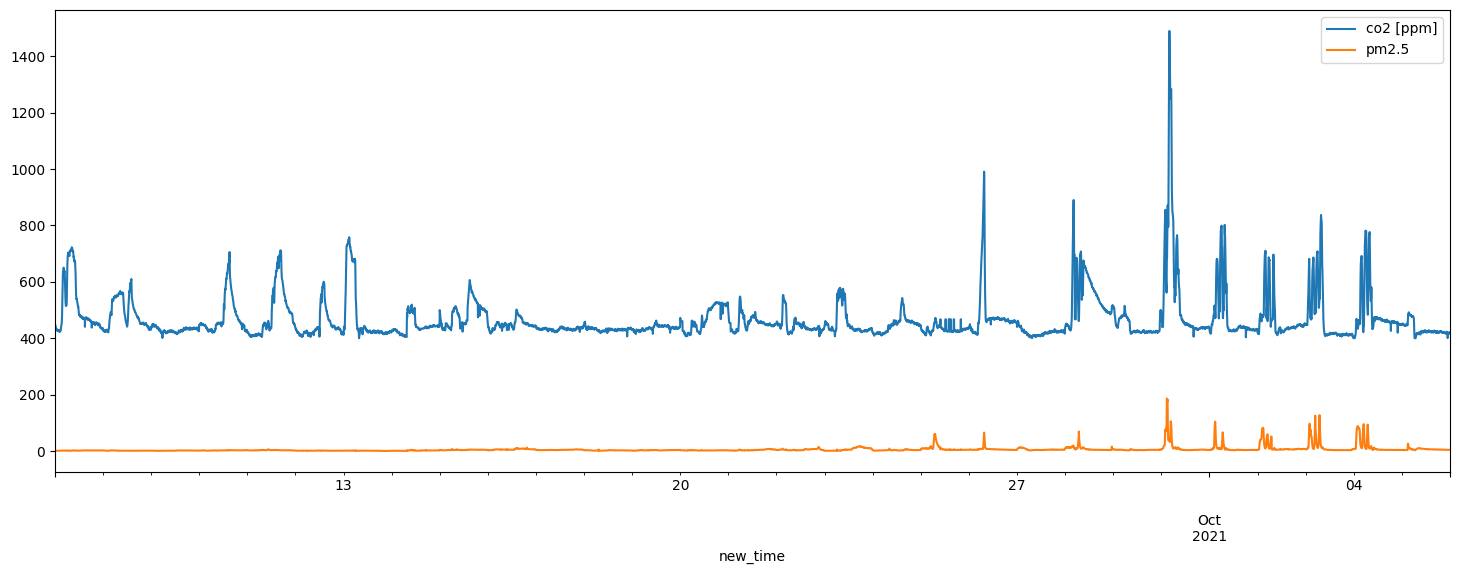

In [15]:
plt.figure(figsize=(18,6))
df["indoor_co2 [ppm]"].plot(label="co2 [ppm]")
df["pm2.5 [mu_g/m3]"].plot(label="pm2.5")
plt.legend()

#### Picking data every ten minutes

In [16]:
index = df.index

In [17]:
index.shape

(8352,)

In [18]:
index

DatetimeIndex(['2021-09-07 00:00:00', '2021-09-07 00:05:00',
               '2021-09-07 00:10:00', '2021-09-07 00:15:00',
               '2021-09-07 00:20:00', '2021-09-07 00:25:00',
               '2021-09-07 00:30:00', '2021-09-07 00:35:00',
               '2021-09-07 00:40:00', '2021-09-07 00:45:00',
               ...
               '2021-10-05 23:10:00', '2021-10-05 23:15:00',
               '2021-10-05 23:20:00', '2021-10-05 23:25:00',
               '2021-10-05 23:30:00', '2021-10-05 23:35:00',
               '2021-10-05 23:40:00', '2021-10-05 23:45:00',
               '2021-10-05 23:50:00', '2021-10-05 23:55:00'],
              dtype='datetime64[ns]', name='new_time', length=8352, freq=None)

In [19]:
new_index = pd.date_range(start=index[0], end=index[-1], freq='10T')
data = df.loc[new_index]

In [20]:
data.shape

(4176, 8)

In [21]:
data.head()

,sound_pressure_level [dba],air_temperature [Celsius],pm2.5 [mu_g/m3],indoor_co2 [ppm],outdoor_relative_humidity [%],fcu_fan_speed [Hz],occupant_count [number],illuminance [lux]
2021-09-07 00:00:00,57.073334,23.564333,2.066667,453.500000,97.704887,0.0,0,0.0
2021-09-07 00:10:00,57.083332,23.424000,1.833333,447.333344,97.400002,0.0,0,0.0
2021-09-07 00:20:00,57.016666,23.309000,1.666667,444.366669,97.403244,0.0,0,0.0
2021-09-07 00:30:00,57.209999,23.264999,1.166667,435.766663,97.599998,0.0,0,0.0
2021-09-07 00:40:00,57.148277,23.170000,1.034483,434.862060,97.199997,0.0,0,0.0


# Data Preprocessing 

In [22]:
data['Seconds'] = data.index.map(pd.Timestamp.timestamp)

In [23]:
data.head()

,sound_pressure_level [dba],air_temperature [Celsius],pm2.5 [mu_g/m3],indoor_co2 [ppm],outdoor_relative_humidity [%],fcu_fan_speed [Hz],occupant_count [number],illuminance [lux],Seconds
2021-09-07 00:00:00,57.073334,23.564333,2.066667,453.500000,97.704887,0.0,0,0.0,1.630973e+09
2021-09-07 00:10:00,57.083332,23.424000,1.833333,447.333344,97.400002,0.0,0,0.0,1.630973e+09
2021-09-07 00:20:00,57.016666,23.309000,1.666667,444.366669,97.403244,0.0,0,0.0,1.630974e+09
2021-09-07 00:30:00,57.209999,23.264999,1.166667,435.766663,97.599998,0.0,0,0.0,1.630975e+09
2021-09-07 00:40:00,57.148277,23.170000,1.034483,434.862060,97.199997,0.0,0,0.0,1.630975e+09


In [24]:
day = 60*60*24
year = 365.2425*day

data['Day sin'] = np.sin(data['Seconds'] * (2* np.pi / day))
data['Day cos'] = np.cos(data['Seconds'] * (2 * np.pi / day))
data['Year sin'] = np.sin(data['Seconds'] * (2 * np.pi / year))
data['Year cos'] = np.cos(data['Seconds'] * (2 * np.pi / year))
data.head()

,sound_pressure_level [dba],air_temperature [Celsius],pm2.5 [mu_g/m3],indoor_co2 [ppm],outdoor_relative_humidity [%],fcu_fan_speed [Hz],occupant_count [number],illuminance [lux],Seconds,Day sin,Day cos,Year sin,Year cos
2021-09-07 00:00:00,57.073334,23.564333,2.066667,453.500000,97.704887,0.0,0,0.0,1.630973e+09,-1.251766e-11,1.000000,-0.913896,-0.405949
2021-09-07 00:10:00,57.083332,23.424000,1.833333,447.333344,97.400002,0.0,0,0.0,1.630973e+09,4.361939e-02,0.999048,-0.913944,-0.405840
2021-09-07 00:20:00,57.016666,23.309000,1.666667,444.366669,97.403244,0.0,0,0.0,1.630974e+09,8.715574e-02,0.996195,-0.913993,-0.405730
2021-09-07 00:30:00,57.209999,23.264999,1.166667,435.766663,97.599998,0.0,0,0.0,1.630975e+09,1.305262e-01,0.991445,-0.914041,-0.405621
2021-09-07 00:40:00,57.148277,23.170000,1.034483,434.862060,97.199997,0.0,0,0.0,1.630975e+09,1.736482e-01,0.984808,-0.914090,-0.405512


In [25]:
data.drop("Seconds", axis=1, inplace=True)

In [26]:
data.columns

Index(['sound_pressure_level [dba]', 'air_temperature [Celsius]',
       'pm2.5 [mu_g/m3]', 'indoor_co2 [ppm]', 'outdoor_relative_humidity [%]',
       'fcu_fan_speed [Hz]', 'occupant_count [number]', 'illuminance [lux]',
       'Day sin', 'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

In [27]:
data = data[['indoor_co2 [ppm]', 'pm2.5 [mu_g/m3]', 'sound_pressure_level [dba]', 'air_temperature [Celsius]',
         'outdoor_relative_humidity [%]',
       'fcu_fan_speed [Hz]', 'occupant_count [number]', 'illuminance [lux]',
       'Day sin', 'Day cos', 'Year sin', 'Year cos']]

In [28]:
data.head()

,indoor_co2 [ppm],pm2.5 [mu_g/m3],sound_pressure_level [dba],air_temperature [Celsius],outdoor_relative_humidity [%],fcu_fan_speed [Hz],occupant_count [number],illuminance [lux],Day sin,Day cos,Year sin,Year cos
2021-09-07 00:00:00,453.500000,2.066667,57.073334,23.564333,97.704887,0.0,0,0.0,-1.251766e-11,1.000000,-0.913896,-0.405949
2021-09-07 00:10:00,447.333344,1.833333,57.083332,23.424000,97.400002,0.0,0,0.0,4.361939e-02,0.999048,-0.913944,-0.405840
2021-09-07 00:20:00,444.366669,1.666667,57.016666,23.309000,97.403244,0.0,0,0.0,8.715574e-02,0.996195,-0.913993,-0.405730
2021-09-07 00:30:00,435.766663,1.166667,57.209999,23.264999,97.599998,0.0,0,0.0,1.305262e-01,0.991445,-0.914041,-0.405621
2021-09-07 00:40:00,434.862060,1.034483,57.148277,23.170000,97.199997,0.0,0,0.0,1.736482e-01,0.984808,-0.914090,-0.405512


#### Convert df to numpy arrays & creating windows of data

In [29]:
def df_to_X_y(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [30]:
X, y = df_to_X_y(data)
X.shape, y.shape

((4169, 7, 12), (4169, 2))

In [31]:
X

array([[[ 4.53500000e+02,  2.06666660e+00,  5.70733337e+01, ...,
          1.00000000e+00, -9.13895843e-01, -4.05948752e-01],
        [ 4.47333344e+02,  1.83333337e+00,  5.70833321e+01, ...,
          9.99048222e-01, -9.13944332e-01, -4.05839571e-01],
        [ 4.44366669e+02,  1.66666663e+00,  5.70166664e+01, ...,
          9.96194698e-01, -9.13992809e-01, -4.05730385e-01],
        ...,
        [ 4.34862060e+02,  1.03448272e+00,  5.71482773e+01, ...,
          9.84807753e-01, -9.14089723e-01, -4.05511996e-01],
        [ 4.28766663e+02,  1.06666672e+00,  5.71833344e+01, ...,
          9.76296007e-01, -9.14138160e-01, -4.05402792e-01],
        [ 4.31566681e+02,  1.03333330e+00,  5.70600014e+01, ...,
          9.65925826e-01, -9.14186585e-01, -4.05293583e-01]],

       [[ 4.47333344e+02,  1.83333337e+00,  5.70833321e+01, ...,
          9.99048222e-01, -9.13944332e-01, -4.05839571e-01],
        [ 4.44366669e+02,  1.66666663e+00,  5.70166664e+01, ...,
          9.96194698e-01, -9.13992809e

#### split the data into training, validation, and test sets

In [32]:
X_train, y_train = X[:3000], y[:3000]
X_val, y_val = X[3000:3800], y[3000:3800]
X_test, y_test = X[3800:], y[3800:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((3000, 7, 12), (3000, 2), (800, 7, 12), (800, 2), (369, 7, 12), (369, 2))

In [33]:
X_train

array([[[ 4.53500000e+02,  2.06666660e+00,  5.70733337e+01, ...,
          1.00000000e+00, -9.13895843e-01, -4.05948752e-01],
        [ 4.47333344e+02,  1.83333337e+00,  5.70833321e+01, ...,
          9.99048222e-01, -9.13944332e-01, -4.05839571e-01],
        [ 4.44366669e+02,  1.66666663e+00,  5.70166664e+01, ...,
          9.96194698e-01, -9.13992809e-01, -4.05730385e-01],
        ...,
        [ 4.34862060e+02,  1.03448272e+00,  5.71482773e+01, ...,
          9.84807753e-01, -9.14089723e-01, -4.05511996e-01],
        [ 4.28766663e+02,  1.06666672e+00,  5.71833344e+01, ...,
          9.76296007e-01, -9.14138160e-01, -4.05402792e-01],
        [ 4.31566681e+02,  1.03333330e+00,  5.70600014e+01, ...,
          9.65925826e-01, -9.14186585e-01, -4.05293583e-01]],

       [[ 4.47333344e+02,  1.83333337e+00,  5.70833321e+01, ...,
          9.99048222e-01, -9.13944332e-01, -4.05839571e-01],
        [ 4.44366669e+02,  1.66666663e+00,  5.70166664e+01, ...,
          9.96194698e-01, -9.13992809e

#### scaling the features

In [34]:
data.head()

,indoor_co2 [ppm],pm2.5 [mu_g/m3],sound_pressure_level [dba],air_temperature [Celsius],outdoor_relative_humidity [%],fcu_fan_speed [Hz],occupant_count [number],illuminance [lux],Day sin,Day cos,Year sin,Year cos
2021-09-07 00:00:00,453.500000,2.066667,57.073334,23.564333,97.704887,0.0,0,0.0,-1.251766e-11,1.000000,-0.913896,-0.405949
2021-09-07 00:10:00,447.333344,1.833333,57.083332,23.424000,97.400002,0.0,0,0.0,4.361939e-02,0.999048,-0.913944,-0.405840
2021-09-07 00:20:00,444.366669,1.666667,57.016666,23.309000,97.403244,0.0,0,0.0,8.715574e-02,0.996195,-0.913993,-0.405730
2021-09-07 00:30:00,435.766663,1.166667,57.209999,23.264999,97.599998,0.0,0,0.0,1.305262e-01,0.991445,-0.914041,-0.405621
2021-09-07 00:40:00,434.862060,1.034483,57.148277,23.170000,97.199997,0.0,0,0.0,1.736482e-01,0.984808,-0.914090,-0.405512


In [35]:
co2_training_mean = np.mean(X_train[:, :, 0])
co2_training_std = np.std(X_train[:, :, 0])

pm_training_mean =np.mean(X_train[:, :, 1])
pm_training_std = np.std(X_train[:, :, 1])

spl_training_mean =np.mean(X_train[:, :, 2])
spl_training_std = np.std(X_train[:, :, 2])

temp_training_mean = np.mean(X_train[:, :, 3])
temp_training_std = np.std(X_train[:, :, 3])

orh_training_mean =np.mean(X_train[:, :, 4])
orh_training_std = np.std(X_train[:, :, 4])

fuc_speed_training_mean =np.mean(X_train[:, :, 5])
fuc_speed_training_std = np.std(X_train[:, :, 5])

oc_speed_training_mean =np.mean(X_train[:, :, 6])
oc_speed_training_std = np.std(X_train[:, :, 6])

lux_speed_training_mean =np.mean(X_train[:, :, 7])
lux_speed_training_std = np.std(X_train[:, :, 7])

In [36]:
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - co2_training_mean) / co2_training_std
  X[:, :, 1] = (X[:, :, 1] - pm_training_mean) / pm_training_std
  X[:, :, 2] = (X[:, :, 2] - spl_training_mean) / spl_training_std
  X[:, :, 3] = (X[:, :, 3] - temp_training_mean) / temp_training_std
  X[:, :, 4] = (X[:, :, 4] - orh_training_mean) / orh_training_std
  X[:, :, 5] = (X[:, :, 5] - fuc_speed_training_mean) / fuc_speed_training_std
  X[:, :, 6] = (X[:, :, 6] - oc_speed_training_mean) / oc_speed_training_std
  X[:, :, 7] = (X[:, :, 7] - lux_speed_training_mean) / lux_speed_training_std


In [37]:
def preprocess_output(y):
  y[:, 0] = (y[:, 0] - co2_training_mean) / co2_training_std
  y[:, 1] = (y[:, 1] - pm_training_mean) / pm_training_std
  return y

In [38]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

In [39]:
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

array([[-7.98608743e-01,  3.01124483e-01],
       [-8.28364669e-01,  2.09067026e-01],
       [-8.29683166e-01,  2.33490452e-01],
       [-7.83354215e-01,  1.65856301e-01],
       [-7.87874037e-01,  1.74310555e-01],
       [-7.95783984e-01,  1.32039286e-01],
       [-7.77645728e-01,  9.76392232e-02],
       [-7.43804997e-01,  8.97680172e-02],
       [-7.81094304e-01,  1.06676525e-01],
       [-6.87306705e-01,  8.13137029e-02],
       [-6.89001250e-01,  7.28594492e-02],
       [-7.15107904e-01,  4.51644965e-02],
       [-7.69794232e-01,  7.28594492e-02],
       [-7.06516207e-01,  2.21339266e-02],
       [-7.31940593e-01,  3.05881802e-02],
       [-7.29680682e-01, -3.22889523e-03],
       [-6.87306705e-01,  1.36796123e-02],
       [-7.09340966e-01, -2.85916567e-02],
       [-6.72051659e-01, -2.01374030e-02],
       [-7.31940593e-01, -1.16831491e-02],
       [-7.41545086e-01, -4.55002249e-02],
       [-6.79961606e-01, -2.85916567e-02],
       [-7.01080317e-01, -3.35476236e-02],
       [-7.

In [40]:
X_train

array([[[-0.09294081, -0.37521642,  0.56304663, ...,  1.        ,
         -0.91389584, -0.40594875],
        [-0.19746311, -0.43439623,  0.56650015, ...,  0.99904822,
         -0.91394433, -0.40583957],
        [-0.24774704, -0.47666756,  0.54347315, ...,  0.9961947 ,
         -0.91399281, -0.40573039],
        ...,
        [-0.40884626, -0.63700701,  0.5889329 , ...,  0.98480775,
         -0.91408972, -0.405512  ],
        [-0.51216076, -0.62884425,  0.60104197, ...,  0.97629601,
         -0.91413816, -0.40540279],
        [-0.46470159, -0.63729853,  0.55844149, ...,  0.96592583,
         -0.91418658, -0.40529358]],

       [[-0.19746311, -0.43439623,  0.56650015, ...,  0.99904822,
         -0.91394433, -0.40583957],
        [-0.24774704, -0.47666756,  0.54347315, ...,  0.9961947 ,
         -0.91399281, -0.40573039],
        [-0.39351362, -0.60348149,  0.61025224, ...,  0.99144486,
         -0.91404127, -0.40562119],
        ...,
        [-0.51216076, -0.62884425,  0.60104197, ...,  

In [41]:
y_test

array([[-7.98608743e-01,  3.01124483e-01],
       [-8.28364669e-01,  2.09067026e-01],
       [-8.29683166e-01,  2.33490452e-01],
       [-7.83354215e-01,  1.65856301e-01],
       [-7.87874037e-01,  1.74310555e-01],
       [-7.95783984e-01,  1.32039286e-01],
       [-7.77645728e-01,  9.76392232e-02],
       [-7.43804997e-01,  8.97680172e-02],
       [-7.81094304e-01,  1.06676525e-01],
       [-6.87306705e-01,  8.13137029e-02],
       [-6.89001250e-01,  7.28594492e-02],
       [-7.15107904e-01,  4.51644965e-02],
       [-7.69794232e-01,  7.28594492e-02],
       [-7.06516207e-01,  2.21339266e-02],
       [-7.31940593e-01,  3.05881802e-02],
       [-7.29680682e-01, -3.22889523e-03],
       [-6.87306705e-01,  1.36796123e-02],
       [-7.09340966e-01, -2.85916567e-02],
       [-6.72051659e-01, -2.01374030e-02],
       [-7.31940593e-01, -1.16831491e-02],
       [-7.41545086e-01, -4.55002249e-02],
       [-6.79961606e-01, -2.85916567e-02],
       [-7.01080317e-01, -3.35476236e-02],
       [-7.

# Model defining 

#### import of TensorFlow and Keras libraries along with specific modules and functions for constructing and training a neural network model.

In [42]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.callbacks import EarlyStopping

#### Define a Sequential model

In [43]:
X_train.shape

(3000, 7, 12)

In [69]:
model = Sequential()

model.add(InputLayer((7, 12)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='linear'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 7, 32)          │         5,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 7, 64)          │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,810 (546.13 KB)

 Trainable params: 139,810 (546.13 KB)

 Non-trainable params: 0 (0.00 B)

#### define necessary callbacks

In [70]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=15)

In [71]:
cp = ModelCheckpoint('Co2_model/model_checkpoint.keras', save_best_only=True)

#### compile model

In [72]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

#### Fit the model to training data

In [73]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, callbacks=[cp, early_stop])

Epoch 1/200


94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - loss: 1.0619 - root_mean_squared_error: 1.0231 - val_loss: 17.7955 - val_root_mean_squared_error: 4.2185
Epoch 2/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.9355 - root_mean_squared_error: 0.9565 - val_loss: 16.7242 - val_root_mean_squared_error: 4.0895
Epoch 3/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.4795 - root_mean_squared_error: 0.6884 - val_loss: 15.1052 - val_root_mean_squared_error: 3.8865
Epoch 4/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.4792 - root_mean_squared_error: 0.6872 - val_loss: 14.4024 - val_root_mean_squared_error: 3.7951
Epoch 5/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.4270 - root_mean_squared_error: 0.6457 - val_loss: 13.7741 - val_root_mean_squared_error: 3.7113
Epoch 6/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2431 - root_mean_squared_error: 0.4893 - val_loss: 12.9216 - val_root_mean_squared_error: 3.5947
Epoch 7/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - los

#### Evaluate the performance of LSTM model

In [74]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

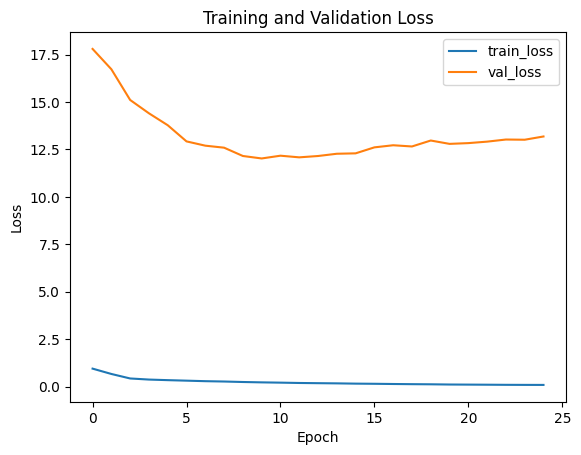

In [75]:
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [76]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


In [77]:
rmse = np.sqrt(mse(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 2.792702313355904


In [78]:
model.save("lstm_model_Co2.h5")

#### load saved best model

In [79]:
co2_load_model = load_model('Co2_model/model_checkpoint.keras')

In [80]:
y_pred_loadmodel = co2_load_model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step


In [81]:
rmse = np.sqrt(mse(y_test, y_pred_loadmodel))
print("RMSE:", rmse)

RMSE: 2.767064093390684


## Comparison between actual temperature and predicted temperature

In [82]:
predictions = model.predict(X)

131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [83]:
predictions.shape

(4169, 2)

In [84]:
y.shape

(4169, 2)

In [85]:
def reverse_preprocessed_co2(arr):
    arr = (arr * co2_training_std ) + co2_training_mean
    return arr

def reverse_preprocessed_pm(arr):
    arr = (arr * pm_training_std ) + pm_training_mean
    return arr

In [86]:
co2_preds, pm_preds = reverse_preprocessed_co2(predictions[:, 0]), reverse_preprocessed_pm(predictions[:, 1])

In [87]:
co2_actuals, pm_actuals = reverse_preprocessed_co2(y[:, 0]), reverse_preprocessed_pm(y[:, 1])

In [88]:
predVSactual = pd.DataFrame({'Actual_val_co2': co2_actuals, 
                             'Predicted_co2': co2_preds,
                             "Actual pm": pm_actuals,
                             "Predicted pm":pm_preds
                             })

In [89]:
predVSactual

,Actual_val_co2,Predicted_co2,Actual pm,Predicted pm
0,428.466675,437.981567,1.000000,0.942427
1,429.233337,435.552368,1.000000,0.819359
2,428.758606,434.122711,1.000000,0.713998
3,429.033325,432.580505,1.033333,0.621691
4,427.866669,431.811127,1.000000,0.599840
...,...,...,...,...
4164,414.233337,421.065796,4.200000,3.800764
4165,415.666656,420.083313,4.233333,3.802582
4166,418.266663,419.475647,4.266667,3.772716
4167,421.821442,419.347321,4.214286,3.748425


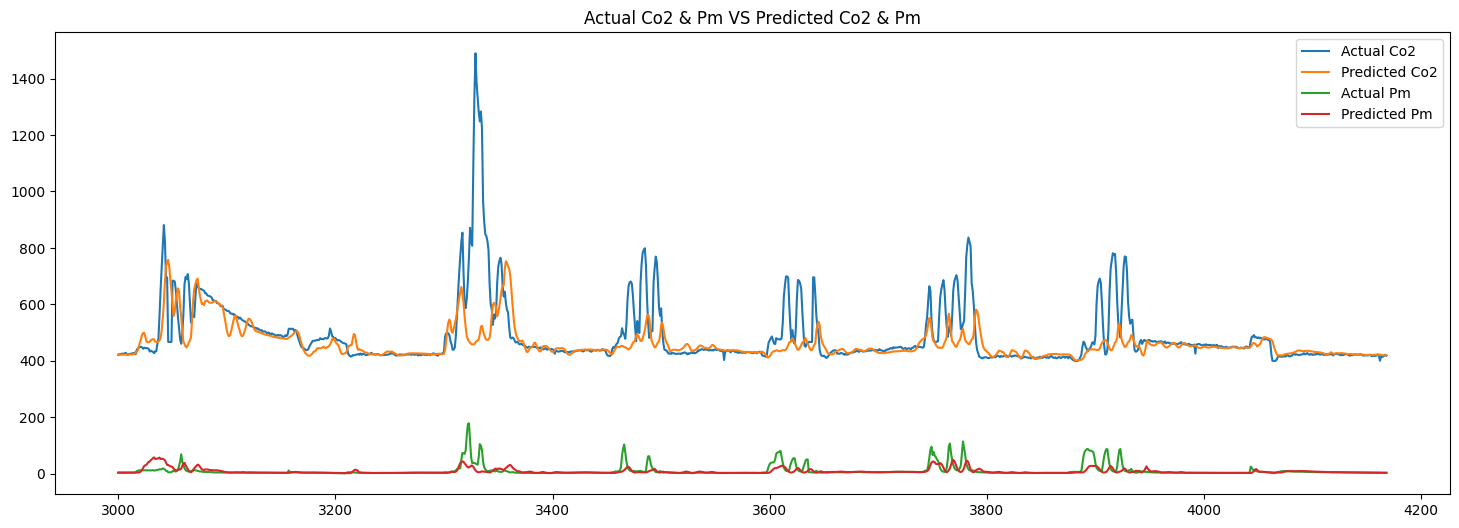

In [91]:
plt.figure(figsize=(18,6))

plt.plot(predVSactual["Actual_val_co2"][3000:], label="Actual Co2")
plt.plot(predVSactual["Predicted_co2"][3000:], label="Predicted Co2")
plt.plot(predVSactual["Actual pm"][3000:], label="Actual Pm")
plt.plot(predVSactual["Predicted pm"][3000:], label="Predicted Pm")
plt.title('Actual Co2 & Pm VS Predicted Co2 & Pm')
plt.legend(loc=0)